# Analysis

* News organizations tend towards neutrality in their public tweets. It is rare for them to exhibit hight positive or negative sentiment scores, and their compound scores generally fall in the neutral range.
* The BBC World News displayed the most consistently neutral position, as its average compound score was just one one-hundreth below zero.
* On the day of analysis, the New York Times displayed the greatest negativity of the five outlets examined. Though it's average compound score was only slightly negative, this is somewhat surprising given its reputation for objectivity.

In [125]:
# import dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [126]:
# set up twitter authentications
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

# Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [127]:
# initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [128]:
# identify target twitter accounts
targets = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

In [129]:
# set up lists to hold the data from api calls and sentiment analysis
twitter_feed = []
source_account = []
text = []
date = []
counterlist = []
compound = []
positive = []
neutral = []
negative = []

In [131]:
# create loop to make api call and analyze the sentiment
for target in targets:
    
    #get the tweets from api call
    tweets = api.user_timeline(target, count=100, result_type="recent")
    # set a counter for establishing 'tweets ago'
    counter = 1
    
    # start the loop to collect and sort the data
    for tweet in tweets:
        twitter_feed.append(target)
        source_account.append(tweet["user"]["name"])
        text.append(tweet["text"])
        date.append(tweet["created_at"])
        counterlist.append(counter)
        
        #add to the counter
        counter += 1

In [132]:
# loop through the text of the tweets to analyze the sentiments
for data in text:
    
    # run the sentiment analysis on each tweet
    sentiment = analyzer.polarity_scores(data)
    
    # Add each value to the appropriate array
    positive.append(sentiment["pos"])
    negative.append(sentiment["neg"])
    neutral.append(sentiment["neu"])
    compound.append(sentiment["compound"])

In [133]:
# set up pandas dataframe
df = pd.DataFrame({
    "Twitter Feed": twitter_feed,
    "Source Account": source_account,
    "Tweet": text,
    "Tweet Date": date,
    "Compound Score": compound,
    "Positive Score": positive,
    "Neutral Score": neutral,
    "Negative Score": negative,
    "Tweets Ago": counterlist
})

# light data cleanup for a presentable dataframe
df = df[[ "Twitter Feed","Source Account", "Tweets Ago", "Tweet","Tweet Date","Compound Score","Positive Score","Neutral Score","Negative Score" ]]

df.head()

,Twitter Feed,Source Account,Tweets Ago,Tweet,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,BBCWorld,BBC News (World),1,World Cup: Nike boots barred for Iran football...,Tue Jun 12 18:37:34 +0000 2018,0.00,0.000,1.000,0.0
1,BBCWorld,BBC News (World),2,Jean-Pierre Bemba: ICC orders release of Congo...,Tue Jun 12 18:05:58 +0000 2018,0.00,0.000,1.000,0.0
2,BBCWorld,BBC News (World),3,Macedonia and Greece: Deal after 27-year row o...,Tue Jun 12 16:55:28 +0000 2018,0.00,0.000,1.000,0.0
3,BBCWorld,BBC News (World),4,Navarro sorry for 'special place in hell'' for...,Tue Jun 12 16:53:14 +0000 2018,0.34,0.208,0.692,0.1
4,BBCWorld,BBC News (World),5,Spanish football league defends phone 'spying'...,Tue Jun 12 16:20:12 +0000 2018,0.00,0.000,1.000,0.0


In [134]:
# save pandas dataframe to a csv file
df.to_csv("Twitter Data", encoding='utf-8', index=False, header=True)

In [135]:
# slice up the dataframe for easier plotting
df1 = df.iloc[0:100, [2,5]]
df2 = df.iloc[100:200, [2, 5]]
df3 = df.iloc[200:300,[2, 5]]
df4 = df.iloc[300:400, [2, 5]]
df5 = df.iloc[400:500,[2, 5]]


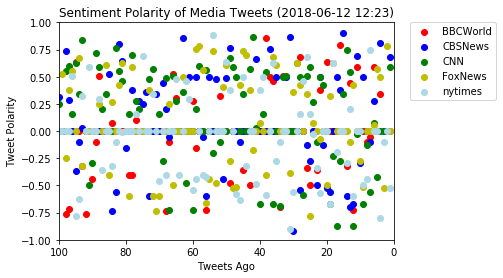

In [136]:
#set the time variables
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

# plot the tweet sentiment analysis
plt.scatter(df1["Tweets Ago"], df1["Compound Score"], marker="o", color="r")
plt.scatter(df2["Tweets Ago"], df2["Compound Score"], marker="o", color="b")
plt.scatter(df3["Tweets Ago"], df3["Compound Score"], marker="o", color="g")
plt.scatter(df4["Tweets Ago"], df4["Compound Score"], marker="o", color="y")
plt.scatter(df5["Tweets Ago"], df5["Compound Score"], marker="o", color="lightblue")
plt.title(f"Sentiment Polarity of Media Tweets ({now})")
plt.xlim(100, 0)
plt.ylim(-1.0, 1.0)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# create a legend for the plot
plt.legend(labels=targets, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# save plot to png
plt.savefig("twitter_sentiment.png")

plt.show()

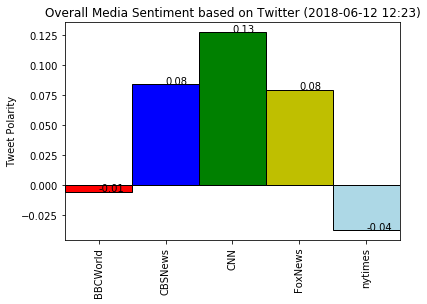

In [137]:
# create a bar plot for data

# create the necessary object to plug into the bar graph
average_tweet_polarity = [df1["Compound Score"].mean(), df2["Compound Score"].mean(), df3["Compound Score"].mean(), \
                          df4["Compound Score"].mean(), df5["Compound Score"].mean()] 
colors = ['r', 'b', 'g', 'y', 'lightblue']


# create bar chart
ax = plt.bar(targets,average_tweet_polarity, color=colors, edgecolor='black', width=1, align='center') 
plt.ylim((min(average_tweet_polarity) - 0.2), (max(average_tweet_polarity) + 0.2))
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.xticks(rotation=90)
plt.ylabel("Tweet Polarity")
plt.autoscale(tight=True)
plt.margins(0, 0.05)


for a,b in zip(targets, average_tweet_polarity):
    plt.text(a, b, "{0:.2f}".format(b))



# save chart to png
plt.savefig("overall_media_sentiment.png")

plt.show()